### Data Bootcamp Final Project: NBA Home Court Advantage

** Author: Allen Zhou **

** Email alz256@stern.nyu.edu **

In any sport, home field has long been seen as a valuable advantage. Every major sports league have playoff home court advantage. Athletes always espouse the energy of playing at home is far greater than in a hostile, away environment. Almost every player will agree that feel more comfortable and play better at home. 

This project aims to analyze the effect of home court advantage of strong and weaker teams through an examination of NBA data using the elo system which 538 developed to ranked teams' relative strengths. The data will be examined in the following steps:

1. Determine the greatest differenences in elo ratings between teams. 
2. Find the teams who won at home despite elo differences (winning against a projected stronger team)
3. Measure the overall amount of such wins for said team 
4. Conclusions of home court advantage based upon team skill

### The Data

The data is found from [538 Github site](https://github.com/fivethirtyeight/data/tree/master/nba-elo). The data set is a complilation of all game results from 1947 to 2015 with all relevant team information from points to each teams elo when each game was played. 

Due to the relative size of the data, I downloaded the file and will access directly from my PC but the link above will give access. The data is public domain and is free to use. 

### Data Packages

During the course of this project, I will be using the following packages:

1. pandas - Used to import and manipulate the data in the Jupyter coding environment
2. matplotlib - Used to graph the data 
3. numpy - used as a foundation for pandas' manipulation 

In [1]:
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 

### Importing and Organizing Data

Given the size of the data set, the dataframe we obtain must be trimmed down into a manageable size as well as reducing the extraneous information. First task is to import the data into our PC. 

Here we pull the dataframe from the website itself, downloading the data and setting the variable for our use. 

In [2]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"


nba = pd.read_csv(url)

In [3]:
nba.tail(5)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,...,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN


Looking at the data, we can see two problems. First, the titles themselves are somewhat uninformative and messy. Additionally, there are so many columns that we cannot see the full table. Thus, we trim some of the data that is unnecessary for our purposes today. 

In [4]:
new_name_list = ["Game Number", "ID", "League", "Repeat", "Year", "Game Date", "Season Game Number", "Playoffs", "Team Abv", "Franchise", "Points", "Elo_Start", "Elo End", "Win Equiv", "Opp Abv", "Opp Franchise", "Opp Score", "Opp_Elo_Start", "Opp Elo End", "Game Location", "Game Result", "Forecast", "Notes"]

nba.columns = new_name_list

In [5]:
nba.tail(5)

,Game Number,ID,League,Repeat,Year,Game Date,Season Game Number,Playoffs,Team Abv,Franchise,...,Win Equiv,Opp Abv,Opp Franchise,Opp Score,Opp_Elo_Start,Opp Elo End,Game Location,Game Result,Forecast,Notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,...,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN


Now we can see that the titles have been fixed. Next onto trimming the table.

In [6]:
nbadf = nba[["Year", "Franchise", "Points", "Opp Franchise", "Opp Score", "Game Location", "Game Result"]]
nbadf = nbadf[nbadf["Year"]>=2000].copy()

nbadf.head(5)

,Year,Franchise,Points,Opp Franchise,Opp Score,Game Location,Game Result
85222,2000,Pelicans,100,Magic,86,H,W
85223,2000,Magic,86,Pelicans,100,A,L
85224,2000,Warriors,96,Mavericks,108,A,L
85225,2000,Mavericks,108,Warriors,96,H,W
85226,2000,Suns,102,Nuggets,107,A,L


Now we have trimmed the dataset as well as limited our set to the years 2000 to 2015. Now we want to add the elo difference back into the dataset, making sure to include the negative numbers since they will denote an extreme elo difference which is the main block of data which we are interested in. Thus we will subtract the home team's elo from the away team's elo to determine the difference. Additionally, we will create a seperate dataset which solely contains home games to being basic analysis. 

In [7]:
nbadf["Elo Difference"] = nba.Elo_Start - nba.Opp_Elo_Start

print(nbadf.head(5))
nbadf.shape

       Year  Franchise  Points Opp Franchise  Opp Score Game Location  \
85222  2000   Pelicans     100         Magic         86             H   
85223  2000      Magic      86      Pelicans        100             A   
85224  2000   Warriors      96     Mavericks        108             A   
85225  2000  Mavericks     108      Warriors         96             H   
85226  2000       Suns     102       Nuggets        107             A   

      Game Result  Elo Difference  
85222           W          7.6307  
85223           L         -7.6307  
85224           L        -10.0332  
85225           W         10.0332  
85226           L        203.1056  


(41092, 8)

In [8]:
print(nbadf[nbadf["Game Location"] == "H"]["Game Location"].value_counts())
# Counting the number of home games. There is an equal amount of away games.

nba_home = nbadf[nbadf["Game Location"] == "H"]


H    20536
Name: Game Location, dtype: int64


In [9]:
nbawins = nba_home[nba_home["Game Result"] == "W"]

nbawins.head(10)

,Year,Franchise,Points,Opp Franchise,Opp Score,Game Location,Game Result,Elo Difference
85222,2000,Pelicans,100,Magic,86,H,W,7.6307
85225,2000,Mavericks,108,Warriors,96,H,W,10.0332
85227,2000,Nuggets,107,Suns,102,H,W,-203.1056
85232,2000,Heat,128,Pistons,122,H,W,-4.1555
85236,2000,Knicks,92,Cavaliers,84,H,W,123.2208
85239,2000,Spurs,89,Sixers,76,H,W,150.8739
85246,2000,Wizards,94,Hawks,87,H,W,-106.1733
85249,2000,Celtics,112,Wizards,101,H,W,31.4164
85253,2000,Cavaliers,97,Nets,90,H,W,11.8950
85255,2000,Lakers,103,Grizzlies,88,H,W,289.0568


At this point, we have two basic dataframes with which to work. nbadf has our basic dataframe which can be manipulated as needed. nbawins is limited to home wins and will be our initial point of analysis.

### Analysis

Before we can engage with the data, we must first understand what exactly elo denotes. In their [website](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/) they explain that elo itself is an arbitrary number which used to denote relative strength, with higher numbers representing stronger teams. The average team is set at 1500 and the system is a zero sum game, where the total elo points across the league does not change. Mathematically, they have determined that 100 points is approximately equal to home court advantage, which equates to 3.5 points in a game. Thus, we must adjust our data to account for this difference. Additionally, we can add an additional point of consideration, that is margin of victory.    

In [10]:
nbawins_sub100 = nbawins[nbawins["Elo Difference"] < -100].copy()
# Here we limit our data set to all elo differences below -100 as a baseline for home court advantage. From here
# we can determine which teams generated wins with the greated elo difference

nbawins["Margin"] = nbawins["Points"] - nbawins["Opp Score"]
# We add the margin of victory as an additional point of consideration 

print(nbawins_sub100["Elo Difference"].mean())
print(nbawins["Elo Difference"].mean())


-175.59123972817602
45.17352617471335


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


The numbers above show that in the average elo difference across the league not accounting for home court advantage. Given the zero sum nature of elo, it makes sense that the league average across wins would be close to 50 since each game has a winner and loser. However, the large negative elo difference when accounting for home court advantage shows that certain teams are winning far more than they should accounting for home court advantage according to the elo rating. From there, we are going to figure out which teams are most likely to cause an upset on home court.

In [11]:
teamwins = nbawins_sub100.groupby("Franchise")["Elo Difference"].nunique()
teamwins.sort_values()
# Counting the number of games each franchise has one when at a >-100 elo difference at home court from 2000-2015

print((teamwins.sort_values()).head(5))
print((teamwins.sort_values()).tail(5))

# Organize the list into the 5 teams with the least and most home court victories when playing at a disadvantage. 

Franchise
Spurs         4
Mavericks    17
Lakers       23
Rockets      37
Heat         42
Name: Elo Difference, dtype: int64
Franchise
Bulls         88
Wizards       92
Warriors      94
Cavaliers     99
Hawks        101
Name: Elo Difference, dtype: int64


From there we want to find the average elo difference for each of the teams in the bottom five to determine overall team ability relative to the league and how much a role home court advantage may have played.

In [12]:
# Here we are created an individual dataframe for each team, both with their wins when elo is lower
# that -100 and with all wins. 

bottom_teams100_Spurs = nbawins_sub100[nbawins_sub100["Franchise"] == "Spurs"].copy()
bottom_teams_Spurs = nbawins[nbawins["Franchise"] == "Spurs"].copy()

bottom_teams100_Mavs = nbawins_sub100[nbawins_sub100["Franchise"] == "Mavericks"].copy()
bottom_teams_Mavs = nbawins[nbawins["Franchise"] == "Mavericks"].copy()

bottom_teams100_Lakers = nbawins_sub100[nbawins_sub100["Franchise"] == "Lakers"].copy()
bottom_teams_Lakers = nbawins[nbawins["Franchise"] == "Lakers"].copy()

bottom_teams100_Rockets = nbawins_sub100[nbawins_sub100["Franchise"] == "Rockets"].copy()
bottom_teams_Rockets = nbawins[nbawins["Franchise"] == "Rockets"].copy()

bottom_teams100_Heat = nbawins_sub100[nbawins_sub100["Franchise"] == "Heat"].copy()
bottom_teams_Heat = nbawins[nbawins["Franchise"] == "Heat"].copy()

In [13]:
# Now combining the individual data sets into a single set for ease of access
# Also finding the mean elo for those wins sub -100 elo.

bottom_teams = [bottom_teams100_Spurs, bottom_teams100_Mavs, bottom_teams100_Lakers, bottom_teams100_Rockets, bottom_teams100_Heat]

print(bottom_teams100_Spurs["Elo Difference"].mean())
print(bottom_teams100_Mavs["Elo Difference"].mean())
print(bottom_teams100_Lakers["Elo Difference"].mean())
print(bottom_teams100_Rockets["Elo Difference"].mean())
print(bottom_teams100_Heat["Elo Difference"].mean())

-125.99997499999989
-149.45425294117646
-169.68866956521742
-149.11320000000003
-168.62070000000003


Now that we have the mean, we will combine the data into a new dataframe comparing the team, average elo and wins through the 15 year span.

In [14]:
bottom_team5 = pd.DataFrame( {
    "Team" : ["Spurs", "Mavs", "Lakers", "Rockets", "Heat"],
    "Average_elo" : [-125.99, -149.45, -169.68, -149.11, -168.62],
    "Wins" : [4, 17, 23, 37, 42]
})

bottom_team5

,Average_elo,Team,Wins
0,-125.99,Spurs,4
1,-149.45,Mavs,17
2,-169.68,Lakers,23
3,-149.11,Rockets,37
4,-168.62,Heat,42


Now we will convert the dataframe into a graph for ease in viewing. Below there is a side by side comparison of average elo deficits versus the amount of wins generated in a 15 year period. 

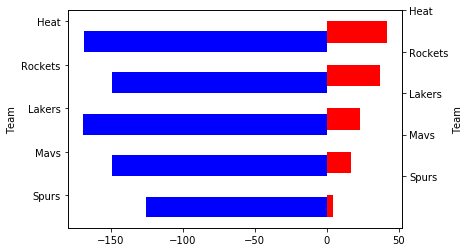

In [15]:
bottom_team5 = pd.DataFrame( {
    "Team" : ["Spurs", "Mavs", "Lakers", "Rockets", "Heat"],
    "Average_elo" : [-125.99, -149.45, -169.68, -149.11, -168.62],
    "Wins" : [4, 17, 23, 37, 42]
})

bottom_team5 = bottom_team5.set_index(["Team"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
bottom_team5.Wins.plot(kind = 'barh', color = "red", ax = ax, position = 1)
bottom_team5.Average_elo.plot(kind = 'barh', color = "blue", ax = ax2, position = 2)
ax.set_ylabel = ("Average Elo")
ax2.set_ylabel = ("Wins")


plt.show()

Now we will do the same for the top five teams.

In [16]:
# Same procedure as above but with the teams with the most low elo wins

bottom_teams100_Bulls = nbawins_sub100[nbawins_sub100["Franchise"] == "Bulls"].copy()
top_teams_Bulls = nbawins[nbawins["Franchise"] == "Bulls"].copy()

bottom_teams100_Wizards = nbawins_sub100[nbawins_sub100["Franchise"] == "Wizards"].copy()
top_teams_Wizards = nbawins[nbawins["Franchise"] == "Wizards"].copy()

bottom_teams100_Warriors = nbawins_sub100[nbawins_sub100["Franchise"] == "Warriors"].copy()
top_teams_Warriors = nbawins[nbawins["Franchise"] == "Warriors"].copy()

bottom_teams100_Cavaliers = nbawins_sub100[nbawins_sub100["Franchise"] == "Cavaliers"].copy()
top_teams_Cavaliers = nbawins[nbawins["Franchise"] == "Cavaliers"].copy()

bottom_teams100_Hawks = nbawins_sub100[nbawins_sub100["Franchise"] == "Hawks"].copy()
top_teams_Hawks = nbawins[nbawins["Franchise"] == "Hawks"].copy()

In [17]:
# Again, same as above.

top_teams = [bottom_teams100_Bulls, bottom_teams100_Wizards, bottom_teams100_Warriors, bottom_teams100_Cavaliers, bottom_teams100_Hawks]

print(bottom_teams100_Bulls["Elo Difference"].mean())
print(bottom_teams100_Wizards["Elo Difference"].mean())
print(bottom_teams100_Warriors["Elo Difference"].mean())
print(bottom_teams100_Cavaliers["Elo Difference"].mean())
print(bottom_teams100_Hawks["Elo Difference"].mean())

-191.84281590909086
-185.34363695652164
-169.90020744680862
-176.50101919191928
-180.51012178217812


In [18]:
top_teams = pd.DataFrame( {
    "Team" : ["Bulls", "Wizards", "Warriors", "Cavaliers", "Hawks"],
    "Average_elo" : [-191.84, -185.34, -169.90, -176.50, -180.51],
    "Wins" : [88, 92, 94, 99, 101]
})

top_teams

,Average_elo,Team,Wins
0,-191.84,Bulls,88
1,-185.34,Wizards,92
2,-169.90,Warriors,94
3,-176.50,Cavaliers,99
4,-180.51,Hawks,101


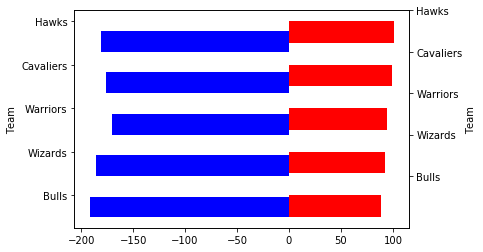

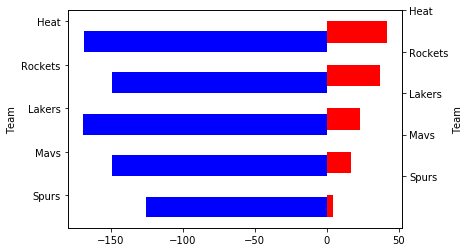

In [19]:
top_teams = pd.DataFrame( {
    "Team" : ["Bulls", "Wizards", "Warriors", "Cavaliers", "Hawks"],
    "Average_elo" : [-191.84, -185.34, -169.90, -176.50, -180.51],
    "Wins" : [88, 92, 94, 99, 101]
})
top_teams = top_teams.set_index(['Team'])
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
top_teams.Wins.plot(kind = 'barh', color = "red", ax = ax, position = 1)
top_teams.Average_elo.plot(kind = 'barh', color = "blue", ax = ax2, position = 2)
ax.set_ylabel = ("Average Elo")
ax2.set_ylabel = ("Wins")


bottom_team5 = pd.DataFrame( {
    "Team" : ["Spurs", "Mavs", "Lakers", "Rockets", "Heat"],
    "Average_elo" : [-125.99, -149.45, -169.68, -149.11, -168.62],
    "Wins" : [4, 17, 23, 37, 42]
})

bottom_team5 = bottom_team5.set_index(["Team"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
bottom_team5.Wins.plot(kind = 'barh', color = "red", ax = ax, position = 1)
bottom_team5.Average_elo.plot(kind = 'barh', color = "blue", ax = ax2, position = 2)
ax.set_ylabel = ("Average Elo")
ax2.set_ylabel = ("Wins")

plt.show()

 

Comparing the two graphs against each other, we see that there is some correlation though not as signficant as expected. The teams who have the most wins do have lower elo's on average compared to their peer teams. There are two possible explanations. The first is that the teams who have more wins have simply been worse in the 15 year span compared to their peers. This would increase the amount of games they would play in which they would not be favored, which would increase the value here. Second, that the teams below simply do not have significant home court advantage. 

In order to add context to the graph above, we want to look at each team's avereage starting elo accross those 15 years. Since 1500 is the league baseline and elo take into account historical performance, we can see whether a team was stronger or worse in relation to the graph. The expectation is that a team with high elo who appears on this chart would be playing even better teams who are less likely to feel the effects of home court advantage relative to more middling teams. For this analysis, we will use all games from the 15 year time span, including playoff games to create a more accurate mean of the team's preformance. 

In [20]:
# Here we restablish our variable to avoid any confusion, adding Elo_Start to our data set. 

nbadf = nba[["Year", "Franchise", "Points", "Elo_Start", "Opp Franchise", "Opp Score", "Game Location", "Game Result"]]
nbadf = nbadf[nbadf["Year"]>=2000].copy()

nbadf.head(10)

,Year,Franchise,Points,Elo_Start,Opp Franchise,Opp Score,Game Location,Game Result
85222,2000,Pelicans,100,1547.1558,Magic,86,H,W
85223,2000,Magic,86,1539.5251,Pelicans,100,A,L
85224,2000,Warriors,96,1432.4757,Mavericks,108,A,L
85225,2000,Mavericks,108,1442.5089,Warriors,96,H,W
85226,2000,Suns,102,1540.8169,Nuggets,107,A,L
85227,2000,Nuggets,107,1337.7113,Suns,102,H,W
85228,2000,Bucks,98,1508.7505,Rockets,93,A,W
85229,2000,Rockets,93,1507.2517,Bucks,98,H,L
85230,2000,Thunder,104,1483.7173,Clippers,92,A,W
85231,2000,Clippers,92,1347.7274,Thunder,104,H,L


In [21]:
# Making a list of average elo through the span of the 15 years for each team, arranged ascending order

nba_elo = nbadf.groupby("Franchise")["Elo_Start"].mean()

print(nba_elo.sort_values())


Franchise
Hornets         1394.579291
Wizards         1433.429257
Knicks          1455.042258
Hawks           1457.339872
Nets            1467.984521
Raptors         1468.077768
Bucks           1469.056528
Timberwolves    1469.370031
Bulls           1471.632379
Clippers        1471.877968
Warriors        1473.503816
Sixers          1476.894533
Grizzlies       1479.125960
Cavaliers       1479.264819
Magic           1497.097646
Kings           1499.505173
Pelicans        1501.004210
Nuggets         1517.013076
Pistons         1523.724965
Pacers          1528.294098
Celtics         1528.369137
Trailblazers    1533.502236
Jazz            1534.619148
Thunder         1537.632305
Rockets         1552.989221
Heat            1554.542775
Suns            1562.278227
Lakers          1596.908854
Mavericks       1605.587013
Spurs           1666.909404
Name: Elo_Start, dtype: float64


From there, I'll pull each team and their corresponding average elo score into a new dataframe and compare. There are ways to pull that data coding wise but at this time I will do so manually.

In [22]:
bottom_elo = pd.DataFrame( {
    "Team" : ["Bulls", "Wizards", "Warriors", "Cavaliers", "Hawks"],
    "Average_elo" : [1471.63, 1433.42, 1473.50, 1479.26, 1457.33]
})

top_elo = pd.DataFrame( {
    "Team" : ["Spurs", "Mavs", "Lakers", "Rockets", "Heat"],
    "Average_elo" : [1666.90, 1605.58, 1596.90, 1552.98, 1554.54]
})

combined_elo = pd.concat([bottom_elo, top_elo], axis = 0)


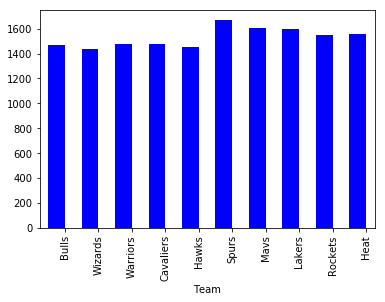

In [23]:
combined_elo = combined_elo.set_index(["Team"])
fig = plt.figure()
ax = fig.add_subplot(111)
combined_elo.Average_elo.plot(kind = 'bar', color = "blue", ax = ax, position = 1)

ax.set_ylabel = ("Average Elo")

plt.show()

Above we see a clear correlation between the teams in the top and bottom of low elo wins. The teams who had the fewest wins all ranked wihtin the top 6 of teams through the psat 15 years. This explains the low amount of low elo wins for those respective teams. In contrast, the teams with a high amount of low elo home game wins all rank towards the bottom of average elo through the past 15 years. There is some variation due to the recent success of the Cavaliers, the Bulls and the Warriors. However, it would make sense for the teams with low average elo to have greater variation in wins than their more skilled counterparts. Teams with high average elo, when faced with losses, would have been facing a more skilled team than even themselves, which explains the reduced amount of wins. 

Overall, it seems that home court advantage plays a greater role for less skilled teams, presumably because better teams have more ability to overcome away court disadvantages. To further isolate the home court variable, the next step is to examine the percentage of wins that these top five teams generated at home versus away.  

In [24]:
#Here we call up the total wins for home and away games for each of the teams in the list above. 

nbadf = nbadf[nbadf["Game Location"] != "N"]

top5_wins = nbadf.groupby(["Franchise", "Game Location"])["Game Result"].count()


print(top5_wins["Bulls"])
print(top5_wins["Wizards"])
print(top5_wins["Warriors"])
print(top5_wins["Cavaliers"])
print(top5_wins["Hawks"])

Game Location
A    691
H    690
Name: Game Result, dtype: int64
Game Location
A    672
H    671
Name: Game Result, dtype: int64
Game Location
A    674
H    673
Name: Game Result, dtype: int64
Game Location
A    694
H    693
Name: Game Result, dtype: int64
Game Location
A    686
H    685
Name: Game Result, dtype: int64


In [26]:
bottom5_wins = nbadf.groupby(["Franchise", "Game Location"])["Game Result"].count()

print(bottom5_wins["Spurs"])
print(bottom5_wins["Mavericks"])
print(bottom5_wins["Lakers"])
print(bottom5_wins["Rockets"])
print(bottom5_wins["Heat"])

Game Location
A    755
H    761
Name: Game Result, dtype: int64
Game Location
A    722
H    717
Name: Game Result, dtype: int64
Game Location
A    744
H    749
Name: Game Result, dtype: int64
Game Location
A    681
H    681
Name: Game Result, dtype: int64
Game Location
A    726
H    737
Name: Game Result, dtype: int64


Looking at the results above, we see an interesting trend. First, the teams which have been the weakest in the past 15 years actually demonstrate an even win ratio for both home and away games. The magnitude of elo differnce greater than 100 points would mean that even with home court advantage, they would be unable to overcome the difference in skill relative to other teams. Compared to the teams with the highest average elo rating who face a unique situation. Due to their higher elo, they are expected to win a greater proportion of their home games. However, their greater skill relative to the teams in the league mean they can generate a greater amount of away game victories because the elo difference is still to great when accounting for home court advantage. 

### Additional Considerations

Knowing that home court difference is 100 elo points, the next point is to examine the affect of home court for teams who faced an elo difference below -100 while on home court. 

In [74]:
# Creating a new dataframe with the data for teams comparing wins from home and away
# We will create a groupby with the home and away wins, adding additional columns to denote the 
# amount 

nbadf["Elo Difference"] = nba.Elo_Start - nba.Opp_Elo_Start

nbadf =nbadf[nbadf["Game Result"] == "W"]

court_wins = nbadf.groupby(["Franchise", "Game Location"])["Game Result"].count()

court_wins = court_wins.unstack(level = -1)

court_wins["Home Difference"] = court_wins["H"] - court_wins["A"]
court_wins["Total Wins"] = court_wins["H"] + court_wins["A"]
court_wins["Home Percentage"] = court_wins["H"]/court_wins["Total Wins"]

court_wins.sort_values(["Home Percentage"], ascending = False)
#court_wins.head(60)

Game Location,A,H,Home Difference,Total Wins,Home Percentage
Franchise,,,,,
Hawks,218,395,177,613,0.644372
Hornets,116,210,94,326,0.644172
Nuggets,246,444,198,690,0.643478
Warriors,223,376,153,599,0.627713
Kings,241,402,161,643,0.625194
Clippers,227,375,148,602,0.622924
Wizards,206,339,133,545,0.622018
Jazz,274,449,175,723,0.621024
Pacers,289,469,180,758,0.618734


In the list above we, see that the top teams in terms of win percentage at home versus away are the Horents, Nuggest, Warriors, Kings and Clippers, with the Wizards and Cavaliers close behind. So here we see some overlap between the teams with the lowest elo and highest home win percentage. 

Additionally, it is important to note that every team has a greater winning percentage at home as opposed to away, showing that home court advantage is significant for teams. 

As a final query, we are going to pull the average elo difference for the 5 teams listed above. 

In [85]:
# Collecting the total wins for each respective franchise
elo_hornets = nbawins[nbawins["Franchise"] == "Hornets"].copy()
elo_kings = nbawins[nbawins["Franchise"] == "Kings"].copy()
elo_nuggets = nbawins[nbawins["Franchise"] == "Nuggets"].copy()
elo_warriors = nbawins[nbawins["Franchise"] == "Warriors"].copy()
elo_hawks = nbawins[nbawins["Franchise"] == "Hawks"].copy()

In [86]:
# Finding the mean elo difference in home wins for each team

print(sum(elo_hornets["Elo Difference"])/len(elo_hornets["Elo Difference"]))
print(sum(elo_nuggets["Elo Difference"])/len(elo_nuggets["Elo Difference"]))
print(sum(elo_kings["Elo Difference"])/len(elo_kings["Elo Difference"]))
print(sum(elo_warriors["Elo Difference"])/len(elo_warriors["Elo Difference"]))
print(sum(elo_hawks["Elo Difference"])/len(elo_hawks["Elo Difference"]))

-56.4367371429
35.2316547297
39.2309751244
9.55499069149
-2.19928607595


Here we see a clear connection between margin of elo difference and home court advantage. All five teams have a very low margin of elo difference in their home wins, with all being within plus minus of 100 elo from 0. It is easy to extrapolate that the data would look very similar with higher amounts of wins for teams at home when they have lower elo differences. 

### Conclusions and Future Considerations

As a conclusion, we found a few things concerning home court advantage
1. Home court advantage favors weaker teams since they have a larger amount of games where home court makes a difference in terms of elo ratings. 
2. The greatest difference in home court victories occur when the difference in elo is plus minus 100, which would allow the 100 point difference from home court to have an effect. 
3. Stronger teams do not really benefit from home court advantage simply because the elo difference is already present and thus the effect is reduced. However, they do have high numbers of away victories which speaks towards their dominance relative to their peers. 

Just observing some of the teams with the greatest home away win percentage, it is clear why some teams rank so highly. The Nuggets and Jazz both play at higher altitudes which is a clear advantage against other teams. Other teams such as the Kings or Cavaliers have been known to have very loyal fanbases which may contribute to their home winning percentage. 

For additional consideration, there are a few factors to consider.
1. Consider the year to year change of each team. It is hard to accurately measure home field advantage in a massive span of years given the rise and fall of teams. Ideally, there could be a regression comparison of elo differences and wins for each team over a period of years. 
2. Injuries and rest days can affect a team's ability without affecting their elo for a period of time. As such it may not accurately reflect the strength of the team at the time. 